In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing libraries for EDA and cleaning

In [80]:
train = pd.read_csv('train.csv')

# Introduction

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the deadliest peacetime sinking of a superliner or cruise ship to date.

Lets us load the train data set and look at the various attributes.

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
for i in train.columns:
    print('NA in col ', i ,' is ' ,train[i].isna().sum())

NA in col  PassengerId  is  0
NA in col  Survived  is  0
NA in col  Pclass  is  0
NA in col  Name  is  0
NA in col  Sex  is  0
NA in col  Age  is  177
NA in col  SibSp  is  0
NA in col  Parch  is  0
NA in col  Ticket  is  0
NA in col  Fare  is  0
NA in col  Cabin  is  687
NA in col  Embarked  is  2


For <b> Data cleaning </b>we have checked the Null / NaN entries in data. Lets us also use heatmap to better visualise the missing value.

<AxesSubplot:>

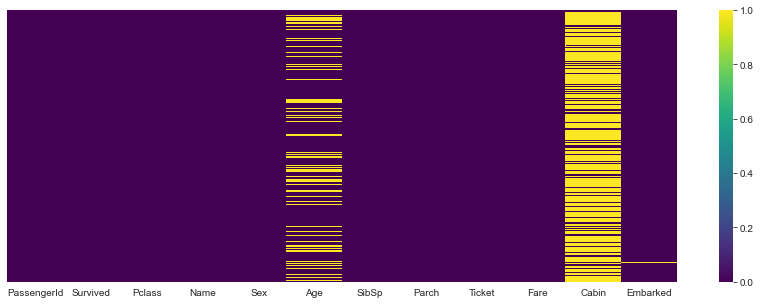

In [85]:
plt.figure(figsize=(15,5))
sns.heatmap(train.isna(),yticklabels=False,cmap='viridis')
#visualisation of missing data

# Exploratory Data Analaysis

The target here is to better understand the data and find out which fields are of significance to be included in model.

<AxesSubplot:xlabel='Survived', ylabel='count'>

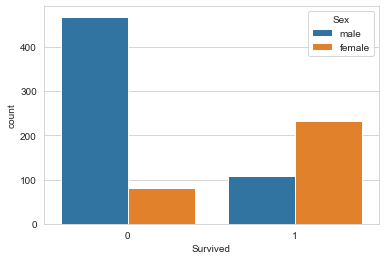

In [86]:
sns.set_style('whitegrid')
sns.countplot(hue='Sex', x='Survived', data=train)

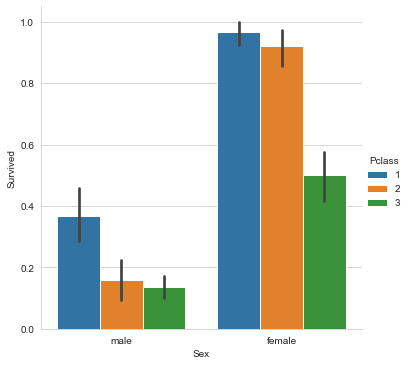

In [87]:
sns.catplot(data=train,hue='Pclass', x='Sex', y='Survived', kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

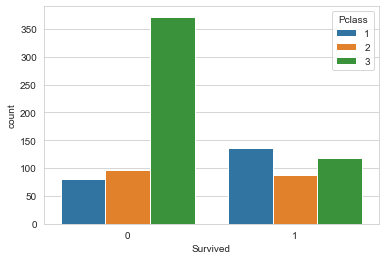

In [88]:
sns.countplot(hue='Pclass', x='Survived', data=train)
#class difference in survival

The above plot along with the gender breakup in all class remove any doubt that the 1st class was imbalanced. In both males and females 1st and 2nd class have a higher chance to survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

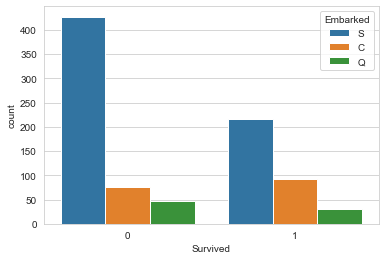

In [89]:
sns.countplot(hue='Embarked', x='Survived', data=train)
#Embarking affect on survival

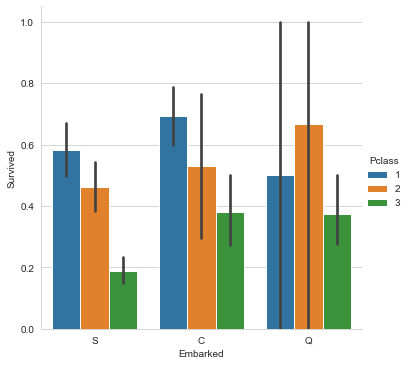

In [90]:
sns.catplot(data=train, y='Survived', x='Embarked', hue='Pclass', kind='bar')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

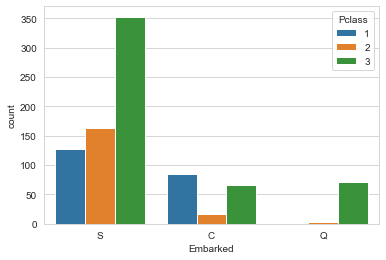

In [91]:
sns.countplot(data=train, x='Embarked', hue='Pclass')

We can see that the proportion of 1st class vs total passenger that embarked is highest for C and this may be the reason we are seeing higher survivability. As this is already covered in the class adding it is not recommendated to prevent collinearity.

<AxesSubplot:xlabel='Age', ylabel='Count'>

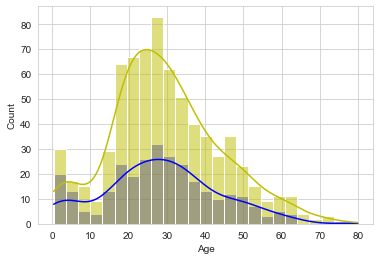

In [92]:
sns.histplot(x='Age',data=train[train.Survived==1],bins=25,color='b', kde=True)
sns.histplot(x='Age',data=train,color='y',bins=25, kde=True)
#survival rate for age group 20-35 seems lower.

In [93]:
def Cabinfloor(a):
    return(list(a))[0]


In [94]:
data=pd.DataFrame(train['Cabin'].dropna().apply(Cabinfloor))
data= pd.concat([data,train.Survived],axis=1)
data=data.dropna()

<AxesSubplot:xlabel='Survived', ylabel='count'>

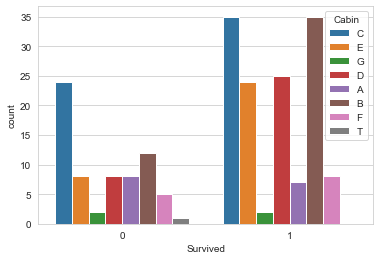

In [95]:
sns.countplot(data=data, x='Survived', hue='Cabin')

<AxesSubplot:xlabel='Survived', ylabel='count'>

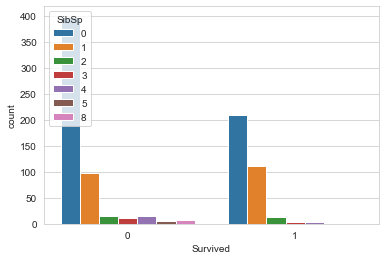

In [96]:
sns.countplot(x='Survived',hue='SibSp',data=train)

It seems that have 1 or 2 (SibSp) Spouse or siblings seems to have a affect on survivability. But let us check with other indicators to ensure there in no collinearity. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

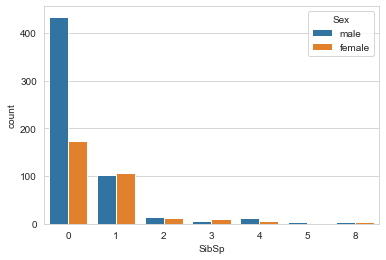

In [97]:
sns.countplot(x='SibSp',hue='Sex',data=train)

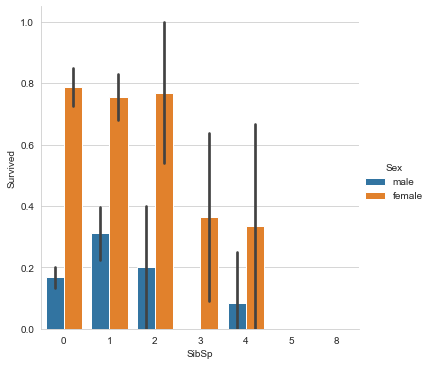

In [98]:
sns.catplot(x='SibSp', y='Survived', data=train, hue='Sex',kind='bar')

From the above plot the following can be inferred that the passenger having atleast 1 or 2 Sibling or Spouse seem higher proportion of females and this leads to better survivability as women and children were given preference. This may be due to Married Couples.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

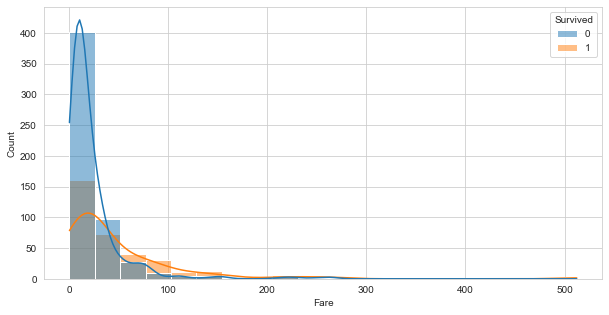

In [99]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='Fare', hue='Survived', bins=20, kde=True)

It can be clearly be seen that the survivability increases with fare paid as upper class passenger were seemingly given preference over others. But this is also reflected in the Pclass category as the value of ticket wont affect much in survivability and as fare vary widely it can skew the prediction. So it is recommended not to use fare for survivability prediction.

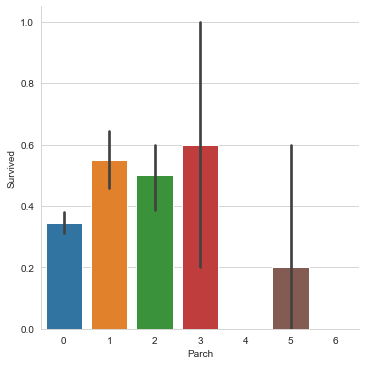

In [100]:
sns.catplot(data=train, x='Parch', y='Survived', kind='bar')

It does seem that having siblings leads to a higher chance of surviving as seen here for 1,2,3 values. This may be true are these mostly may be children and they were given preference during rescue. This can also be seen below where it can be seen that children have a higher chance of survival.

<Figure size 144x360 with 0 Axes>

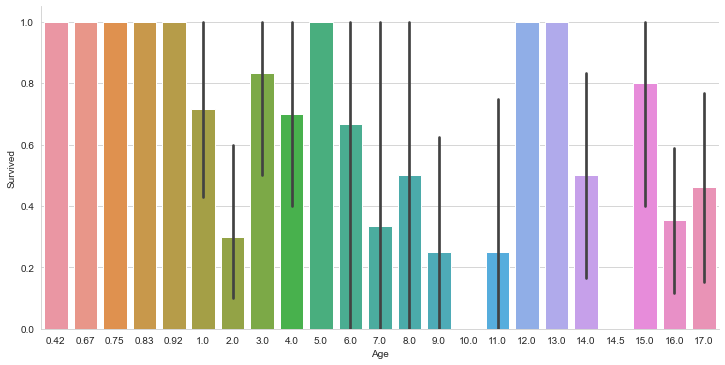

In [101]:
plt.figure(figsize=(2,5))
sns.catplot(data=train[train.Age<18], x='Age', y='Survived', kind='bar', aspect = 2, height=5)

Based on the above EDA we can select <b> Pclass, Sex, Age, Parch and Embarked </b> as inputs. Categorical variable is to converted to dummy variables.

# Conclusion of EDA and research.

As per sources Titanic only had enough lifeboats to carry about half of those on board; if the ship had carried her full complement, only about a third could have been accommodated in the lifeboats. The "women and children first" protocol was generally followed when loading the lifeboats, and most of the male passengers and crew were left aboard. Third-class passengers were largely left to fend for themselves, causing many of them to become trapped below decks as the ship filled with water.

Our Exploratory Data Analysis also supports this view as we see a large different in male vs female survival and the survival rate of Class 1,2 vs Class 3. The upper deck seem to have a better survivability as seen in the graph, but do very clear to find a trend as many values are missing. Also as the inputs from class and Cabin are collinear, Cabin field can be dropped from the analysis.

### Source wikipedia: https://en.wikipedia.org/wiki/Titanic

# Data cleaning and transforming for use in modeling

Visual representation of Null / NaN in Data

In [102]:
train_Copy=train
#train=train_Copy

As in the exploratory data analysis and research we have observed that Gender and the Class were significant contributors to survivability let us use <b> Gender and Class </b> to get estimates to replace with <b> Age </b>.

In [103]:
EstimatedAge = train.groupby(by=['Sex','Pclass']).Age.mean()

In [104]:
EstimatedAge

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

We have calculate the age mean for these 6 categories. We see good variation so the category selection seems good.

In [105]:
def Imputer_titan(a):
    if a.isna()[0]==True:
        return EstimatedAge.loc[a[1],a[2]]
    else:
        return(a[0])


In [106]:
train.Age=train[['Age','Sex','Pclass']].apply(Imputer_titan,axis=1)

Replacing the missing values by category mean.

In [107]:
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)
Pclass.head()
Pclass.columns=['Pclass2', 'Pclass3']


Creating dummies variable for Pclass w.r.t. Class 1.

In [108]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)
Sex.columns=['Gender Male']


Creating dummies variable for Sex w.r.t. Female.

In [109]:
Parch = pd.get_dummies(train['Parch'],drop_first=True)
Parch.columns=['Parch 1','Parch 2','Parch 3','Parch 4','Parch 5','Parch 6']


Creating dummies variable for Parch w.r.t. 0 value.

In [110]:
train = pd.concat([train,Pclass,Sex,Parch],axis=1)
# added the new dummy variables for class,Gender in the dataset

Adding the dummy variables created.

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Pclass2,Pclass3,Gender Male,Parch 1,Parch 2,Parch 3,Parch 4,Parch 5,Parch 6
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,1,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,1,1,0,0,0,0,0,0


Removing the variable for which Dummy variables are created that is 'Pclass', 'Sex', 'Parch'. Other field also removed that seem to be not significant in prediction as per our EDA like 'PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'. 
Note:-'SibSp' is added as it helped model at end see the explaination.

In [112]:
train=train.drop(columns=['PassengerId','Pclass','Cabin','Name','Sex','Ticket', 'Parch','Fare', 'Embarked'])

In [113]:
train.isna().sum()

Survived       0
Age            0
SibSp          0
Pclass2        0
Pclass3        0
Gender Male    0
Parch 1        0
Parch 2        0
Parch 3        0
Parch 4        0
Parch 5        0
Parch 6        0
dtype: int64

No missing value or error seem to be present. We can not start modelling.
    

# Modelling

We will use a simple logistic regression for now. As the data size is small we should try to use simpler model (Occam's Razor). If the performance is not satisfactory then we can use more complex model.

# LOGISTIC REGRESSION

We will split the train data set into 2 parts, test and validation. After we have trained the model and finalised it we shall retrain the model on entire train set to get better accuracy and see predictions on the test dataset. 

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# importing libraries needed

In [115]:
X_train, X_test, Y_train, Y_test=train_test_split(train.drop(columns=['Survived','SibSp'],axis=1),train.Survived,test_size=0.3,random_state=42)
#SibSp removed as we first do without SibSp as per EDA. Added so that same set can be used.

In [116]:
logistmodel= LogisticRegression()
logistmodel.fit(X_train,Y_train)

LogisticRegression()

In [117]:
predictions = logistmodel.predict(X_test)

In [118]:
logistmodel.coef_

array([[-0.02926643, -0.64059538, -1.92735472, -2.4063947 ,  0.43866809,
        -0.48712648,  0.60211458, -0.74140899, -0.65189769, -0.33054245]])

In [119]:
X_train.columns

Index(['Age', 'Pclass2', 'Pclass3', 'Gender Male', 'Parch 1', 'Parch 2',
       'Parch 3', 'Parch 4', 'Parch 5', 'Parch 6'],
      dtype='object')

# Evaluation of Model

Now we shall evaluate the model based on metrics.

In [120]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.78      0.69      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



The performance of the model seems a bit low. We should examine the coefficients to verifiy if our understanding of the data was inline with the result of the model.

In [121]:
logistmodel.coef_

array([[-0.02926643, -0.64059538, -1.92735472, -2.4063947 ,  0.43866809,
        -0.48712648,  0.60211458, -0.74140899, -0.65189769, -0.33054245]])

In [122]:
X_train.columns

Index(['Age', 'Pclass2', 'Pclass3', 'Gender Male', 'Parch 1', 'Parch 2',
       'Parch 3', 'Parch 4', 'Parch 5', 'Parch 6'],
      dtype='object')

We can see that the Parch dummy variable is not giving results as expected and the values are not consistent or follow trend. Therefore we should drop it.

In [126]:
X_train, X_test, Y_train, Y_test=train_test_split(train.drop(columns=['Survived', 'Parch 2','Parch 3','Parch 4', 'Parch 5', 'Parch 6','SibSp'],axis=1),train.Survived,test_size=0.3,random_state=42)
#SibSp removed as not need now only change in performance to be checked.

In [127]:
logistmodel= LogisticRegression()
logistmodel.fit(X_train,Y_train,)
predictions = logistmodel.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



We can see an improvement in the performance. We can revist SibSp to improve as see its impact.

In [143]:
X_train, X_test, Y_train, Y_test=train_test_split(train.drop(columns=['Survived','Parch 1', 'Parch 2','Parch 3','Parch 4', 'Parch 5', 'Parch 6'],axis=1),train.Survived,test_size=0.3,random_state=42)
logistmodel= LogisticRegression()
logistmodel.fit(X_train,Y_train,)
predictions = logistmodel.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.72      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



We can see a further improvement in performance and therefore this seems best available set of feautures.

In [144]:
logistmodel.coef_

array([[-0.03595125, -0.29769636, -0.68735506, -1.98126075, -2.43311549]])

In [145]:
X_train.columns

Index(['Age', 'SibSp', 'Pclass2', 'Pclass3', 'Gender Male'], dtype='object')

# Model Preparation

Training the model selected over the entire train data and getting prediction for test data.

In [139]:
trainX_f=train.drop(columns=['Survived','Parch 1','Parch 2','Parch 3','Parch 4','Parch 5','Parch 6'],axis=1)
trainY_f=train['Survived']

In [140]:
logistmodelf= LogisticRegression()
logistmodelf.fit(trainX_f,trainY_f)

LogisticRegression()

In [156]:
test=pd.read_csv('test.csv')

In [158]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [159]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As there are missing Age in test data too we will use the same data cleaning method. Imputation will be done independently to prevent any bleeding of data from train set to test set.

In [160]:
EstimatedAge = test.groupby(by=['Sex','Pclass']).Age.mean()
EstimatedAge

Sex     Pclass
female  1         41.333333
        2         24.376552
        3         23.073400
male    1         40.520000
        2         30.940678
        3         24.525104
Name: Age, dtype: float64

In [161]:
test.Age=test[['Age','Sex','Pclass']].apply(Imputer_titan,axis=1)

In [162]:
Pclass = pd.get_dummies(test['Pclass'],drop_first=True)
Pclass.head()
Pclass.columns=['Pclass2', 'Pclass3']
Sex = pd.get_dummies(test['Sex'],drop_first=True)
Sex.columns=['Gender Male']
test = pd.concat([test,Pclass,Sex],axis=1)
# added the new dummy variables for class,Gender in the dataset
test=test.drop(columns=['PassengerId','Pclass','Cabin','Name','Sex','Ticket', 'Parch','Fare', 'Embarked'])

In [163]:
test

,Age,SibSp,Pclass2,Pclass3,Gender Male
0,34.500000,0,0,1,1
1,47.000000,1,0,1,0
2,62.000000,0,1,0,1
3,27.000000,0,0,1,1
4,22.000000,1,0,1,0
...,...,...,...,...,...
413,24.525104,0,0,1,1
414,39.000000,0,0,0,0
415,38.500000,0,0,1,1
416,24.525104,0,0,1,1


In [195]:
predictionsx=pd.DataFrame(columns=['Survived'])
predictionsx.index.name = 'PassengerId'
predictionsx['Survived']=logistmodelf.predict(test)
predictionsx

,Survived
PassengerId,
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0


In [196]:
predictionsx.to_csv('PredictionsFinal')